# Reusing the datachallenge implementation for exploring global usecase with different constellation

## Creating novel input data configuration

### Visualizing the fields and their explanations

In [1]:
!ocb-dc_ose_2021-input_data --cfg job -p params

# @package params
sat: ???
sat_list:
- alg
- h2ag
- j2g
- j2n
- j3
- s3a
min_time: '2016-12-01'
max_time: '2018-02-01'
min_lon: -66.0
max_lon: -54.0
min_lat: 32.0
max_lat: 44.0


In [2]:
!ocb-dc_ose_2021-input_data --help

Overview:
    Download and prepare data for SSH Mapping (requires CMEMS credentials for download)
    The ssh is computed as "sla_filtered + mdt - lwe"

Basic CLI Usage:
  *  params.sat=<sat_id> to download a prepare a specific satellite

  *  --multirun: Execute the pipeline for each sat in sat_list

  *  params.(min|max)_(lon|lat|time)=<bound> to change the bound

  *  `-cd conf overrides=my_conf` to load config from conf/aprl/overrides/my_conf.yaml

Params:
    sat (str): altimeter id to download (place holder for multirun)
    sat_list (str): list of satellite to download
    min_time: start of the temporal domain
    max_time: end of the temporal domain
    min_lon: lower longitudinal bound
    max_lon: upper longitudinal bound
    min_lat: upper latitudinal bound
    max_lat: upper latitudinal bound

Parts:
	_01_dl_track -> copernicusmarine.python_interface.get.get
	_02_prepare_track -> ocb_dc_ose_2021.mods.prepare_track.prepare_track

Misc:
    Run  with "dry=True hydra.verbose=

### Writing new file

In [3]:
!mkdir -p conf/aprl/overrides

In [4]:
%%writefile conf/aprl/overrides/global.yaml
# @package params

sat_list: [j3, s3b, h2ag, c2]
min_time: 2019-05-01
max_time: 2019-05-31
min_lon: -180
max_lon: 180
min_lat: -90
max_lat: 90

Writing conf/aprl/overrides/global.yaml


In [5]:
%%bash
ocb-dc_ose_2021-input_data -m \
    'hydra.searchpath=[file://conf]'  +overrides@params=global\
     dry=True

[2024-04-10 16:37:31,152][HYDRA] Launching 4 jobs locally


[2024-04-10 16:37:31,152][HYDRA] 	#0 : params.sat=j3 +overrides@params=global dry=True


[2024-04-10 16:37:31,251][aprl.appareil][INFO] - Starting


[2024-04-10 16:37:31,251][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-10 16:37:31,251][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 16:37:31,251][aprl.appareil][INFO] - Done


[2024-04-10 16:37:31,252][HYDRA] 	#1 : params.sat=s3b +overrides@params=global dry=True


[2024-04-10 16:37:31,350][aprl.appareil][INFO] - Starting


[2024-04-10 16:37:31,350][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-10 16:37:31,350][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 16:37:31,350][aprl.appareil][INFO] - Done


[2024-04-10 16:37:31,351][HYDRA] 	#2 : params.sat=h2ag +overrides@params=global dry=True


[2024-04-10 16:37:31,449][aprl.appareil][INFO] - Starting


[2024-04-10 16:37:31,449][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-10 16:37:31,449][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 16:37:31,449][aprl.appareil][INFO] - Done


[2024-04-10 16:37:31,449][HYDRA] 	#3 : params.sat=c2 +overrides@params=global dry=True


[2024-04-10 16:37:31,546][aprl.appareil][INFO] - Starting


[2024-04-10 16:37:31,546][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-10 16:37:31,546][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 16:37:31,546][aprl.appareil][INFO] - Done


In [6]:
%%bash
ocb-dc_ose_2021-input_data -m \
    'hydra.searchpath=[file://conf]' \
      +overrides@params=global \
      hydra/launcher=joblib \
      hydra.launcher.n_jobs=4 \
      hydra.launcher.backend=multiprocessing

[2024-04-10 16:37:33,098][HYDRA] Joblib.Parallel(n_jobs=4,backend=loky,prefer=processes,require=None,verbose=0,timeout=None,pre_dispatch=2*n_jobs,batch_size=auto,temp_folder=None,max_nbytes=None,mmap_mode=r) is launching 4 jobs


[2024-04-10 16:37:33,098][HYDRA] Launching jobs, sweep output dir : multirun/2024-04-10/16-37-32


[2024-04-10 16:37:33,098][HYDRA] 	#0 : params.sat=j3 +overrides@params=global


[2024-04-10 16:37:33,098][HYDRA] 	#1 : params.sat=s3b +overrides@params=global


[2024-04-10 16:37:33,098][HYDRA] 	#2 : params.sat=h2ag +overrides@params=global


[2024-04-10 16:37:33,098][HYDRA] 	#3 : params.sat=c2 +overrides@params=global


[2024-04-10 16:37:34,069][aprl.appareil][INFO] - Starting


[2024-04-10 16:37:34,069][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-10 16:37:34,093][aprl.appareil][INFO] - Starting


[2024-04-10 16:37:34,093][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-10 16:37:34,095][aprl.appareil][INFO] - Starting


[2024-04-10 16:37:34,095][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-10 16:37:34,116][aprl.appareil][INFO] - Starting


[2024-04-10 16:37:34,116][aprl.appareil][INFO] - Running part _01_dl_track


INFO - 2024-04-10T16:37:34Z - Dataset version was not specified, the latest one was selected: "202112"


[2024-04-10 16:37:34,425][copernicus_marine_root_logger][INFO] - Dataset version was not specified, the latest one was selected: "202112"


INFO - 2024-04-10T16:37:34Z - Dataset part was not specified, the first one was selected: "default"


[2024-04-10 16:37:34,426][copernicus_marine_root_logger][INFO] - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-10T16:37:34Z - Service was not specified, the default one was selected: "original-files"


[2024-04-10 16:37:34,426][copernicus_marine_root_logger][INFO] - Service was not specified, the default one was selected: "original-files"


INFO - 2024-04-10T16:37:34Z - Downloading using service original-files...


[2024-04-10 16:37:34,426][copernicus_marine_root_logger][INFO] - Downloading using service original-files...


INFO - 2024-04-10T16:37:34Z - Dataset version was not specified, the latest one was selected: "202112"


[2024-04-10 16:37:34,685][copernicus_marine_root_logger][INFO] - Dataset version was not specified, the latest one was selected: "202112"


INFO - 2024-04-10T16:37:34Z - Dataset part was not specified, the first one was selected: "default"


[2024-04-10 16:37:34,685][copernicus_marine_root_logger][INFO] - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-10T16:37:34Z - Service was not specified, the default one was selected: "original-files"


[2024-04-10 16:37:34,685][copernicus_marine_root_logger][INFO] - Service was not specified, the default one was selected: "original-files"


INFO - 2024-04-10T16:37:34Z - Downloading using service original-files...


[2024-04-10 16:37:34,685][copernicus_marine_root_logger][INFO] - Downloading using service original-files...


INFO - 2024-04-10T16:37:35Z - Dataset version was not specified, the latest one was selected: "202112"


[2024-04-10 16:37:35,065][copernicus_marine_root_logger][INFO] - Dataset version was not specified, the latest one was selected: "202112"


INFO - 2024-04-10T16:37:35Z - Dataset part was not specified, the first one was selected: "default"


[2024-04-10 16:37:35,065][copernicus_marine_root_logger][INFO] - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-10T16:37:35Z - Service was not specified, the default one was selected: "original-files"


[2024-04-10 16:37:35,065][copernicus_marine_root_logger][INFO] - Service was not specified, the default one was selected: "original-files"


INFO - 2024-04-10T16:37:35Z - Downloading using service original-files...


[2024-04-10 16:37:35,065][copernicus_marine_root_logger][INFO] - Downloading using service original-files...


INFO - 2024-04-10T16:37:35Z - Dataset version was not specified, the latest one was selected: "202112"


[2024-04-10 16:37:35,548][copernicus_marine_root_logger][INFO] - Dataset version was not specified, the latest one was selected: "202112"


INFO - 2024-04-10T16:37:35Z - Dataset part was not specified, the first one was selected: "default"


[2024-04-10 16:37:35,548][copernicus_marine_root_logger][INFO] - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-10T16:37:35Z - Service was not specified, the default one was selected: "original-files"


[2024-04-10 16:37:35,548][copernicus_marine_root_logger][INFO] - Service was not specified, the default one was selected: "original-files"


INFO - 2024-04-10T16:37:35Z - Downloading using service original-files...


[2024-04-10 16:37:35,548][copernicus_marine_root_logger][INFO] - Downloading using service original-files...


100%|██████████| 31/31 [00:06<00:00,  4.50it/s]


[2024-04-10 16:37:42,461][aprl.appareil][INFO] - part _01_dl_track done


[2024-04-10 16:37:42,462][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 16:37:42,462][ocb_dc_ose_2021.mods.prepare_track][INFO] - Starting


100%|██████████| 31/31 [00:07<00:00,  4.31it/s]


[2024-04-10 16:37:43,531][aprl.appareil][INFO] - part _01_dl_track done


[2024-04-10 16:37:43,532][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 16:37:43,532][ocb_dc_ose_2021.mods.prepare_track][INFO] - Starting


100%|██████████| 31/31 [00:07<00:00,  4.13it/s]


[2024-04-10 16:37:43,539][aprl.appareil][INFO] - part _01_dl_track done


[2024-04-10 16:37:43,539][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 16:37:43,540][ocb_dc_ose_2021.mods.prepare_track][INFO] - Starting


100%|██████████| 31/31 [00:08<00:00,  3.85it/s]


[2024-04-10 16:37:43,889][aprl.appareil][INFO] - part _01_dl_track done


[2024-04-10 16:37:43,889][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 16:37:43,889][ocb_dc_ose_2021.mods.prepare_track][INFO] - Starting


[2024-04-10 16:37:48,289][ocb_dc_ose_2021.mods.prepare_track][INFO] - Done


[2024-04-10 16:37:48,311][aprl.appareil][INFO] - part _02_prepare_track done


[2024-04-10 16:37:48,311][aprl.appareil][INFO] - Done


[2024-04-10 16:37:48,734][ocb_dc_ose_2021.mods.prepare_track][INFO] - Done


[2024-04-10 16:37:48,750][aprl.appareil][INFO] - part _02_prepare_track done


[2024-04-10 16:37:48,750][aprl.appareil][INFO] - Done


[2024-04-10 16:37:49,555][ocb_dc_ose_2021.mods.prepare_track][INFO] - Done


[2024-04-10 16:37:49,571][aprl.appareil][INFO] - part _02_prepare_track done


[2024-04-10 16:37:49,571][aprl.appareil][INFO] - Done


[2024-04-10 16:37:49,765][ocb_dc_ose_2021.mods.prepare_track][INFO] - Done


[2024-04-10 16:37:49,782][aprl.appareil][INFO] - part _02_prepare_track done


[2024-04-10 16:37:49,782][aprl.appareil][INFO] - Done


In [7]:
import xarray as xr
import pandas as pd

obs = xr.open_mfdataset('data/prepared/input/*.nc', combine='nested',concat_dim='time')
obs

<xarray.Dataset> Size: 167MB
Dimensions:  (time: 5217445)
Coordinates:
  * time     (time) datetime64[ns] 42MB 2019-05-01T00:19:46.307290112 ... 201...
    lon      (time) float64 42MB dask.array<chunksize=(1394167,), meta=np.ndarray>
    lat      (time) float64 42MB dask.array<chunksize=(1394167,), meta=np.ndarray>
Data variables:
    ssh      (time) float64 42MB dask.array<chunksize=(1394167,), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea surface height measured by altimeter...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-3 sea su...
    time_coverage_duration:          P22H56M25.547915S
    time_coverage_end:               2019-05-01T23:16:11Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2019-05-01T00:19:46Z
    title:                           DT Cryosat-2 Global Ocean Along track SS...

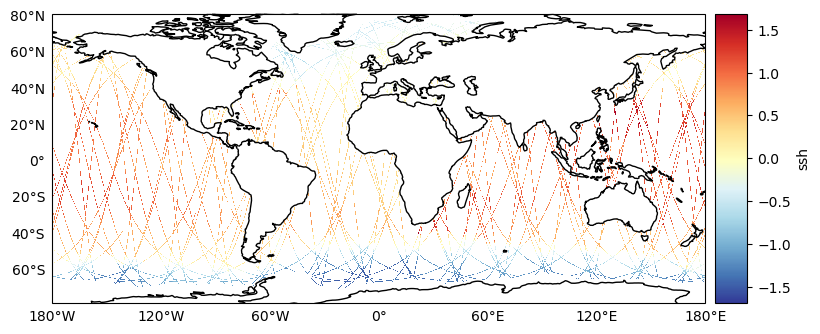

In [8]:
import hvplot.xarray
import hvplot
hvplot.extension('matplotlib')
%matplotlib inline

bin_size = 0.25
to_plot = (obs.where((obs.time>pd.to_datetime('2019-05-15')) & (obs.time<pd.to_datetime('2019-05-16')) )
.drop_vars('time').assign(
        lat=obs.lat / bin_size // 1 * bin_size,
        lon=obs.lon / bin_size // 1 * bin_size
    )[['ssh', 'lat', 'lon']].load()
    .drop_vars('time')
    .to_dataframe()
    .groupby(['lat', 'lon']).mean()
    .to_xarray()
).ssh
hvfig = to_plot.hvplot(
    kind='quadmesh',
    geo=True,
    coastline=True,
    width=700,
    cmap='RdYlBu_r'
)
bokfig = hvplot.render(hvfig, backend='matplotlib')
bokfig

In [9]:
!wget https://gist.githubusercontent.com/quentinf00/2d034392ee9b385fb4de3c8628bfc844/raw/aaeaed8ce5a1559507be8dd52e37c134f777192c/patcher_oi_torch.py

--2024-04-10 16:38:00--  https://gist.githubusercontent.com/quentinf00/2d034392ee9b385fb4de3c8628bfc844/raw/aaeaed8ce5a1559507be8dd52e37c134f777192c/patcher_oi_torch.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.


HTTP request sent, awaiting response... 

200 OK
Length: 4242 (4,1K) [text/plain]
Saving to: ‘patcher_oi_torch.py’

patcher_oi_torch.py 100%[===================>]   4,14K  --.-KB/s    in 0s      

2024-04-10 16:38:00 (62,8 MB/s) - ‘patcher_oi_torch.py’ saved [4242/4242]



<script src="https://gist.github.com/quentinf00/2d034392ee9b385fb4de3c8628bfc844.js"></script>

In [10]:
import numpy as np
import xarray as xr
import pandas as pd
from functools import partial
from xrpatcher import XRDAPatcher
from patcher_oi_torch import oi


outgrid = oi(
    outgrid_da=xr.DataArray(
        dims=('time', 'lat', 'lon'),
        coords=dict(
            time=pd.date_range('2019-05-15', '2019-05-15'),
            lat=np.arange(-90, 90, .25),
            lon=np.arange(-180, 180, .25),
        ),
    ),
    patcher_cls=partial(XRDAPatcher,
        patches=dict(time=1, lat=80, lon=360),
        strides=dict(time=1, lat=80, lon=360)
    ),
    obs=obs.load(),
    lt=pd.to_timedelta('7D'), lx=1., ly=1.,
    noise=0.05,
    obs_dt=pd.to_timedelta('2D'), obs_dx=.5, obs_dy=.5,
    device='cuda'
)

  0%|                                                                                                                           | 0/36 [00:00<?, ?it/s]

  3%|███▏                                                                                                               | 1/36 [00:03<01:45,  3.01s/it]

  6%|██████▍                                                                                                            | 2/36 [00:03<00:45,  1.33s/it]

  8%|█████████▌                                                                                                         | 3/36 [00:03<00:25,  1.28it/s]

 11%|████████████▊                                                                                                      | 4/36 [00:03<00:16,  1.90it/s]

 14%|███████████████▉                                                                                                   | 5/36 [00:22<03:42,  7.18s/it]

 17%|███████████████████▏                                                                                               | 6/36 [00:36<04:50,  9.69s/it]

 19%|██████████████████████▎                                                                                            | 7/36 [00:50<05:20, 11.05s/it]

 22%|█████████████████████████▌                                                                                         | 8/36 [01:01<05:02, 10.81s/it]

 25%|████████████████████████████▊                                                                                      | 9/36 [01:15<05:25, 12.07s/it]

 28%|███████████████████████████████▋                                                                                  | 10/36 [01:27<05:08, 11.85s/it]

 31%|██████████████████████████████████▊                                                                               | 11/36 [01:42<05:21, 12.88s/it]

 33%|██████████████████████████████████████                                                                            | 12/36 [01:53<04:53, 12.24s/it]

 36%|█████████████████████████████████████████▏                                                                        | 13/36 [02:05<04:42, 12.27s/it]

 39%|████████████████████████████████████████████▎                                                                     | 14/36 [02:10<03:39, 10.00s/it]

 42%|███████████████████████████████████████████████▌                                                                  | 15/36 [02:16<03:05,  8.81s/it]

 44%|██████████████████████████████████████████████████▋                                                               | 16/36 [02:21<02:35,  7.80s/it]

 47%|█████████████████████████████████████████████████████▊                                                            | 17/36 [02:33<02:52,  9.07s/it]

 50%|█████████████████████████████████████████████████████████                                                         | 18/36 [02:37<02:15,  7.53s/it]

 53%|████████████████████████████████████████████████████████████▏                                                     | 19/36 [02:41<01:47,  6.33s/it]

 56%|███████████████████████████████████████████████████████████████▎                                                  | 20/36 [02:49<01:49,  6.83s/it]

 58%|██████████████████████████████████████████████████████████████████▌                                               | 21/36 [02:58<01:50,  7.39s/it]

 61%|█████████████████████████████████████████████████████████████████████▋                                            | 22/36 [03:04<01:37,  6.97s/it]

 64%|████████████████████████████████████████████████████████████████████████▊                                         | 23/36 [03:04<01:05,  5.07s/it]

 67%|████████████████████████████████████████████████████████████████████████████                                      | 24/36 [03:10<01:04,  5.39s/it]

 69%|███████████████████████████████████████████████████████████████████████████████▏                                  | 25/36 [03:15<00:57,  5.25s/it]

 72%|██████████████████████████████████████████████████████████████████████████████████▎                               | 26/36 [03:22<00:56,  5.65s/it]

 75%|█████████████████████████████████████████████████████████████████████████████████████▌                            | 27/36 [03:22<00:36,  4.05s/it]

 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 28/36 [03:25<00:29,  3.74s/it]

 81%|███████████████████████████████████████████████████████████████████████████████████████████▊                      | 29/36 [03:27<00:21,  3.04s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 30/36 [03:32<00:22,  3.74s/it]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▏               | 31/36 [03:33<00:14,  2.82s/it]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 32/36 [03:33<00:08,  2.16s/it]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 33/36 [03:33<00:04,  1.56s/it]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 34/36 [03:34<00:02,  1.16s/it]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 35/36 [03:35<00:01,  1.10s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [03:35<00:00,  1.23it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [03:35<00:00,  5.98s/it]

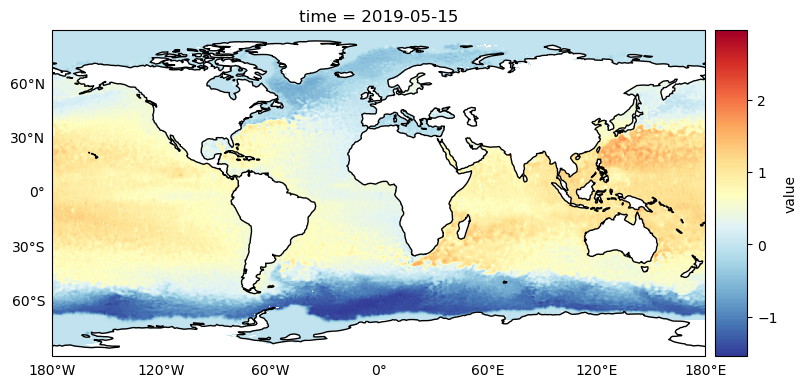

In [11]:
from global_land_mask import globe
lat = outgrid.lat.values
lon = outgrid.lon.values
lon_grid, lat_grid = np.meshgrid(lon,lat)
globe_ocean_mask = globe.is_ocean(lat_grid, lon_grid)
out_plot = (
    outgrid.sel(time='2019-05-15').where(globe_ocean_mask)
    .pipe(lambda ds: ds.where(ds <3))
    .pipe(lambda ds: ds.where(ds >-3))
)
hvfig = out_plot.hvplot(
    kind='quadmesh',
    geo=True,
    coastline=True,
    width=700,
    cmap='RdYlBu_r'
)
bokfig = hvplot.render(hvfig, backend='matplotlib')
bokfig

/raid/localscratch/qfebvre/ocb/ocb-docs/lib/python3.11/site-packages/pint/facets/plain/quantity.py:998: RuntimeWarning: divide by zero encountered in divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


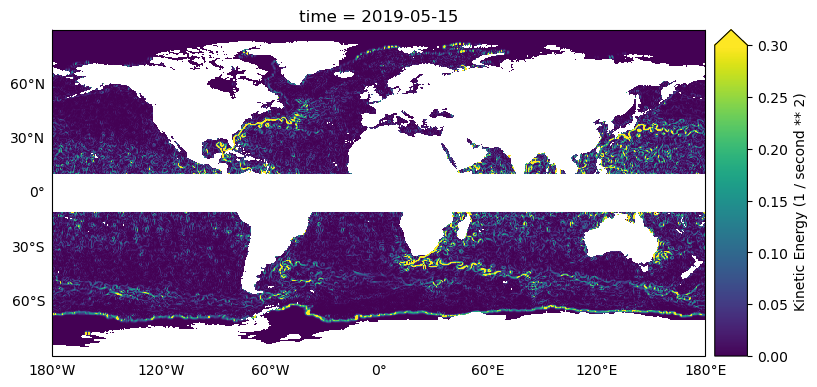

In [12]:
import ocn_tools._src.geoprocessing.geostrophic as geo
import ocn_tools._src.geoprocessing.validation as val
hvfig = (
    out_plot
    .where(np.abs(out_plot.lat)>10)
    .to_dataset(name='ssh')
    .pipe(val.validate_latlon)
    .pipe(geo.geostrophic_velocities)
    .pipe(geo.kinetic_energy)
).ke.hvplot(
    kind='quadmesh',
    geo=True,
    width=700,
    cmap='viridis',
    clim=(0, 0.3)
)
bokfig = hvplot.render(hvfig, backend='matplotlib')
bokfig

In [13]:
!ocb-dc_ose_2021-metrics --cfg job -p params

# @package params
method: default
study_path: data/downloads/method_outputs/${.method}.nc
study_var: ssh
sat: c2
min_time: '2017-01-01'
max_time: '2017-12-31'
min_lon: -65.0
max_lon: -55.0
min_lat: 33.0
max_lat: 43.0


In [14]:
%%writefile conf/aprl/overrides/global_eval.yaml
# @package params

study_path: output.nc
study_var: ssh
sat: alg
min_time: '2019-05-15'
max_time: '2019-05-16'
min_lon: -180
max_lon: 180
min_lat: -90
max_lat: 90

Writing conf/aprl/overrides/global_eval.yaml


In [15]:
%%bash
ocb-dc_ose_2021-metrics -m \
    'hydra.searchpath=[file://conf]' \
      +overrides@params=global_eval \
      dry=True

[2024-04-10 16:41:55,528][HYDRA] Launching 1 jobs locally


[2024-04-10 16:41:55,528][HYDRA] 	#0 : +overrides@params=global_eval dry=True


[2024-04-10 16:41:55,643][aprl.appareil][INFO] - Starting


[2024-04-10 16:41:55,644][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-10 16:41:55,644][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 16:41:55,644][aprl.appareil][INFO] - Running part _03_interp_on_track


[2024-04-10 16:41:55,644][aprl.appareil][INFO] - Running part _04_1_lambdax


[2024-04-10 16:41:55,644][aprl.appareil][INFO] - Running part _04_2_mu


[2024-04-10 16:41:55,644][aprl.appareil][INFO] - Done


In [16]:
dt, t = pd.to_timedelta("1D"), pd.to_datetime('2019-05-15')
out_grid = outgrid.pipe(val.validate_latlon).pad(time=1, mode='edge').assign_coords(
    time=pd.date_range(t-dt, t+dt, freq=dt)
).to_dataset(name='ssh')
out_grid.to_netcdf('output.nc')

In [17]:
%%bash
ocb-dc_ose_2021-metrics \
  'hydra.searchpath=[file://conf]' \
    +overrides@params=global_eval dry=True

[2024-04-10 16:41:58,419][aprl.appareil][INFO] - Starting


[2024-04-10 16:41:58,419][aprl.appareil][INFO] - Running part _01_dl_track


[2024-04-10 16:41:58,419][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 16:41:58,419][aprl.appareil][INFO] - Running part _03_interp_on_track


[2024-04-10 16:41:58,419][aprl.appareil][INFO] - Running part _04_1_lambdax


[2024-04-10 16:41:58,419][aprl.appareil][INFO] - Running part _04_2_mu


[2024-04-10 16:41:58,419][aprl.appareil][INFO] - Done


In [18]:
%%bash
ocb-dc_ose_2021-metrics\
    'hydra.searchpath=[file://conf]' \
     +overrides@params=global_eval

[2024-04-10 16:42:01,151][aprl.appareil][INFO] - Starting


[2024-04-10 16:42:01,151][aprl.appareil][INFO] - Running part _01_dl_track


INFO - 2024-04-10T16:42:01Z - Dataset version was not specified, the latest one was selected: "202112"


[2024-04-10 16:42:01,692][copernicus_marine_root_logger][INFO] - Dataset version was not specified, the latest one was selected: "202112"


INFO - 2024-04-10T16:42:01Z - Dataset part was not specified, the first one was selected: "default"


[2024-04-10 16:42:01,692][copernicus_marine_root_logger][INFO] - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-10T16:42:01Z - Service was not specified, the default one was selected: "original-files"


[2024-04-10 16:42:01,692][copernicus_marine_root_logger][INFO] - Service was not specified, the default one was selected: "original-files"


INFO - 2024-04-10T16:42:01Z - Downloading using service original-files...


[2024-04-10 16:42:01,692][copernicus_marine_root_logger][INFO] - Downloading using service original-files...


100%|██████████| 31/31 [00:08<00:00,  3.84it/s]


[2024-04-10 16:42:10,829][aprl.appareil][INFO] - part _01_dl_track done


[2024-04-10 16:42:10,829][aprl.appareil][INFO] - Running part _02_prepare_track


[2024-04-10 16:42:10,829][ocb_dc_ose_2021.mods.prepare_track][INFO] - Starting


[2024-04-10 16:42:13,067][ocb_dc_ose_2021.mods.prepare_track][INFO] - Done


[2024-04-10 16:42:13,079][aprl.appareil][INFO] - part _02_prepare_track done


[2024-04-10 16:42:13,079][aprl.appareil][INFO] - Running part _03_interp_on_track


[2024-04-10 16:42:13,080][ocb_dc_ose_2021.mods.interp_on_track][INFO] - Starting


[2024-04-10 16:42:13,142][ocb_dc_ose_2021.mods.interp_on_track][INFO] - Done


[2024-04-10 16:42:13,142][aprl.appareil][INFO] - part _03_interp_on_track done


[2024-04-10 16:42:13,142][aprl.appareil][INFO] - Running part _04_1_lambdax


[2024-04-10 16:42:13,142][ocb_dc_ose_2021.mods.lambdax][INFO] - Starting


[2024-04-10 16:42:13,256][ocb_dc_ose_2021.mods.lambdax][INFO] - Effective scale resolved (interpolated at score 0.5) 180.35


[2024-04-10 16:42:13,266][ocb_dc_ose_2021.mods.lambdax][INFO] - Done


[2024-04-10 16:42:13,267][aprl.appareil][INFO] - part _04_1_lambdax done


[2024-04-10 16:42:13,267][aprl.appareil][INFO] - Running part _04_2_mu


[2024-04-10 16:42:13,267][ocb_dc_ose_2021.mods.mu][INFO] - Starting


[2024-04-10 16:42:13,307][ocb_dc_ose_2021.mods.mu][INFO] - Mu score: 0.9249225777323533


[2024-04-10 16:42:13,307][ocb_dc_ose_2021.mods.mu][INFO] - Done


[2024-04-10 16:42:13,307][aprl.appareil][INFO] - part _04_2_mu done


[2024-04-10 16:42:13,307][aprl.appareil][INFO] - Done


In [19]:
import pandas as pd
import glob
print(pd.concat([pd.read_json(p, typ='series') for p in glob.glob('data/metrics/*.json')]).to_markdown())

|             |          0 |
|:------------|-----------:|
| $\lambda_x$ | 180.355    |
| $\mu$       |   0.924923 |
